In [2]:
import numpy as np
import pandas as pd
from scipy.special import gammaln, gamma
from collections import Counter
from scipy.optimize import basinhopping
np.set_printoptions(suppress=True)
import math

In [69]:
# Load the data and process it.
#data = np.array([0, 21255, 3480, 498, 64, 7])
#data = np.array([0, 22844, 2951, 373, 30, 3])
data = np.array([0.0, 42962.0, 14128.0, 4141.0, 1114.0, 280.0, 58.0, 14.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

S = 30
V = data.sum()
U = 200000 - V
print(S, V, U)

30 62699.0 137301.0


In [66]:
# Alpha Beta version
def BB(S, k, alpha, beta):
    up   = gammaln(k + alpha) + gammaln(S - k + beta) + gammaln(alpha + beta)
    down = gammaln(alpha) + gammaln(beta) + gammaln(S + alpha + beta)
    return up - down

In [67]:
def mll(initParams):
    # params
    f0    = initParams[0]
    alpha = initParams[1]
    beta  = initParams[2]
    
    N = gammaln(V + f0 +1) - gammaln(f0 + 1) 
    L0 = f0 * BB(S, 0, alpha, beta)
    Lk = np.sum(data * BB(S, np.arange(S+1), alpha, beta))
    
    obj = N + G0 + L0 + Lk + Gk
    return -obj

In [68]:
# Bounds
B= [(0,None), (0, None), (0, None)]

#args
minimizer_kwargs = dict(method="TNC", bounds=B)

#run
initParams = np.array([1, 1, 5])
res = basinhopping(mll, initParams, minimizer_kwargs=minimizer_kwargs)#, niter = 1000)
print(res)
print(res['x'][0] + V)
alpha0 = res['x'][1]
beta0 = res['x'][2]
μ=alpha0/(alpha0+beta0)
τ=alpha0+beta0
print(μ, τ)

/Users/ded/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Users/ded/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """
/Users/ded/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/Users/ded/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


                        fun: 7631406.454015168
 lowest_optimization_result:      fun: 7631406.454015168
     jac: array([115.76339602,  -4.84287739,   4.28408384])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 10
     nit: 1
  status: 2
 success: True
       x: array([   0.        ,   52.08790733, 1030.56675928])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 38
                       nfev: 2607
                        nit: 100
                          x: array([   0.        ,   52.08790733, 1030.56675928])
62699.0
0.0481112851037529 1082.6546666094227


In [47]:
mll([110128.23230586,      1.48765494,     84.31159061])

-294667.92390817066

In [48]:
mll([U,  .8,  5])

-132199.9185076654

In [50]:
mll([1101208, 0.1, 5])

-188250.83112710086

In [41]:
200000 - 25304

174696

In [22]:
mll([83793.7773379 ,     0.19999895,     4.07278073,     0.01197954,
           0.70142692])

-110056.33441323455

In [64]:
mll([234776.72579006,      0.03929604,      3.78447354,      0.01050833,
            0.33356468])

-121053.78927293565

In [67]:
mll([57392.28189185,     0.38756928,     4.32406151,     0.01459061,
           0.80091354])

-120812.86576105905

In [114]:
mll([125104.16766101,      0.09702091,      3.89744013,      0.01093061,
            0.54677371])

-121029.53788561595

In [43]:
mll([12.8,      0.09702091,      3.89744013])

-97002.804319622

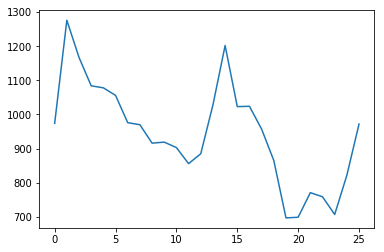

In [25]:
ddd = dict(Counter(data[data['count'] == 1]['max'].values))
lists = sorted(ddd.items())
x, y = zip(*lists)
plt.plot(x, y)

In [78]:
lists

[(0, 928),
 (1, 1228),
 (2, 1132),
 (3, 1049),
 (4, 1035),
 (5, 1016),
 (6, 926),
 (7, 923),
 (8, 882),
 (9, 887),
 (10, 849),
 (11, 821),
 (12, 836),
 (13, 993),
 (14, 1126),
 (15, 972),
 (16, 961),
 (17, 894),
 (18, 804),
 (19, 629),
 (20, 625),
 (21, 678),
 (22, 659),
 (23, 602),
 (24, 643),
 (25, 700),
 (26, 826),
 (27, 807),
 (28, 761),
 (29, 821),
 (30, 726),
 (31, 840),
 (32, 857),
 (33, 865),
 (34, 1092),
 (35, 31)]

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [311]:
np.sum(data * BB(S, np.arange(S), 2, 5)[:len(data)])

-3699.97920997422

In [305]:
BB(S, 0, 2, 5)

-9.410911062437663

In [296]:
up

inf

In [298]:
gamma(S-k+5)

inf

In [304]:
np.arange(S)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [345]:
np.sum(data * BB(S, np.arange(S), 2, 5))

ValueError: operands could not be broadcast together with shapes (1001,) (1000,) 

In [348]:
data.shape

(1001,)